<a href="https://colab.research.google.com/github/riccricc91/CNN/blob/master/HorseHuman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Horses or humans

In this notebook, I developped Image Classification (CNN) with tesbsorflow

The dataset is available from kaggle competion: https://www.kaggle.com/sanikamal/horses-or-humans-dataset

**Import Packages**

In [1]:
try:
  %tensorflow_version 2.2
  print(tf.__version__)
except Exception:
  pass

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (Input, Activation, Dense, Flatten, Conv2D, 
                                     MaxPooling2D, Dropout, BatchNormalization)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import numpy as np
from google.colab import files
from keras.preprocessing import image
import datetime
import seaborn as sns
import pandas as pd
!pip install -U tensorboard >piplog 2>&1

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.2`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


Using TensorFlow backend.


Upload the dataset from GoogleDrive and define the directory from GoogleDrive for the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_dir = '/content/drive/My Drive/PythonRicc/dataset/horse_or_human/horse-or-human/train'
val_dir = '/content/drive/My Drive/PythonRicc/dataset/horse_or_human/horse-or-human/validation'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
train_horses_dir = os.path.join('/content/drive/My Drive/PythonRicc/dataset/horse_or_human/train/horses')
train_humans_dir = os.path.join('/content/drive/My Drive/PythonRicc/dataset/horse_or_human/train/humans')

val_horses_dir = os.path.join('/content/drive/My Drive/PythonRicc/dataset/horse_or_human/validation/horses')
val_humans_dir = os.path.join('/content/drive/My Drive/PythonRicc/dataset/horse_or_human/validation/humans')

In [0]:
train_horse_names = os.listdir(train_horses_dir)
train_human_names = os.listdir(train_humans_dir)

val_horse_names = os.listdir(val_horses_dir)
val_human_names = os.listdir(val_humans_dir)

**Let's explore the dataset**

In [0]:
def plot_imm(dir_img, img_plot, n_img):
  for i in range(n_img):
    img_path = os.path.join(dir_img, img_plot[i]) 
    plt.subplot(2,2,i+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)

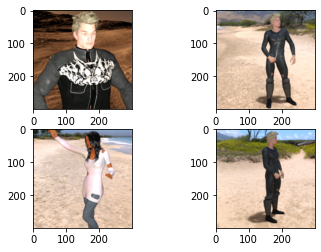

In [6]:
plot_imm(train_humans_dir, train_human_names,4)

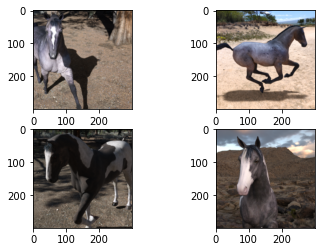

In [7]:
plot_imm(train_horses_dir, train_horse_names,4)

In [0]:
len_train_horses = len(os.listdir(train_horses_dir))
len_train_human  = len(os.listdir(train_humans_dir))
len_val_horses   = len(os.listdir(val_horses_dir))
len_val_human    = len(os.listdir(val_humans_dir))

In [9]:
print('total training horse images:', train_humans_dir)
print('total training human images:', len_train_human)

print('total validation horse images:', len_val_horses)
print('total validation human images:', len_val_human)

total training horse images: /content/drive/My Drive/PythonRicc/dataset/horse_or_human/train/humans
total training human images: 497
total validation horse images: 128
total validation human images: 128


In [10]:
d = {'class' : ['horses','human'],'train': [len_train_horses, len_train_human], 'val': [len_val_horses, len_val_human]}
data_clas = pd.DataFrame(data=d)
data_clas

,class,train,val
0,horses,500,128
1,human,497,128


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


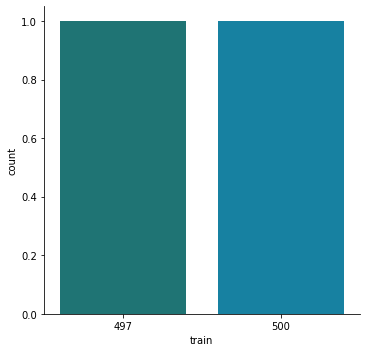

In [11]:
sns.factorplot('train',data=data_clas,kind="count",palette='winter_d')

**Preprocessing and rescale**

In [12]:
train_generator = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                  )

val_generator   = ImageDataGenerator(rescale=1/255, 
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                  )

train_generator = train_generator.flow_from_directory(train_dir, target_size=(300, 300), 
                                                    batch_size=128,  class_mode='binary')

validation_generator = val_generator.flow_from_directory(val_dir, target_size=(300, 300), 
                                                    batch_size=128,  class_mode='binary')


Found 940 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


**Model Creation**

Steps are:

*   Build the model,
*   Define the loss function and the optimizer,
*   Compile the model,
*   Fit the data to the model,
*   Predict a new image,


**Build the model**

In [0]:
class model (tf.keras.Model):
    
    def __init__(self):
       
        super(model, self).__init__()
        
        self.conv_1      = Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=(300, 300, 3)) 
        self.max_pool_1  = MaxPooling2D(pool_size=(2, 2))
        self.conv_2      = Conv2D(32, kernel_size=(3, 3), activation='relu') 
        self.max_pool_2  = MaxPooling2D(pool_size=(2, 2))
        self.Dropout_1   = Dropout(0.3)
        self.conv_3      = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_3  = MaxPooling2D(pool_size=(2, 2)) 
        self.conv_4      = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_4  = MaxPooling2D(pool_size=(2, 2)) 
        self.Dropout_2   = Dropout(0.3)

        self.conv_5      = Conv2D(64, kernel_size=(3, 3), activation='relu') 
        self.max_pool_5  = MaxPooling2D(pool_size=(2, 2)) 
        self.Dropout_3   = Dropout(0.3)
  
        self.flatten     = tf.keras.layers.Flatten()
 
        self.dense_1     = tf.keras.layers.Dense(units=128, activation='relu')
        self.dense_2     = tf.keras.layers.Dense(units=1, activation='sigmoid')
        
    def call(self, inputs):

        x = self.max_pool_1(self.conv_1(inputs))
        x = self.max_pool_2(self.conv_2(x))
        x = self.Dropout_1(x)
        x = self.max_pool_3(self.conv_3(x))
        x = self.max_pool_4(self.conv_4(x))
        x = self.Dropout_2(x)
        x = self.max_pool_5(self.conv_5(x))
        x = self.Dropout_3(x)
                
        x = self.flatten(x)
        x = self.dense_1(x)     
        x = self.dense_2(x)
        
        return x

In [0]:
model = model()

**Define the loss function and the optimizer**

In [0]:
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-3)

**Compile the model**

In [0]:
model.compile(optimizer=optimizer,
              loss=loss_object,
              metrics=['acc'])

Define Tensorboard

In [0]:
log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

**Define a callback** 

stop the train if the loss is less of 0.2

In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.2):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

In [0]:
callbacks = myCallback()

In [0]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs', histogram_freq=2, write_graph=True, write_images=True,
    update_freq='epoch', profile_batch=2, embeddings_freq=0,
)

**Fit the model**

In [21]:
history = model.fit_generator(
      train_generator,
      validation_data=validation_generator, 
      epochs=12,
      verbose=1,
      callbacks=[tensorboard_callback, callbacks])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 8 steps, validate for 2 steps
Epoch 1/12
8/8 [==============================] - 110s 14s/step - loss: 1.2009 - acc: 0.5266 - val_loss: 0.7095 - val_acc: 0.5000
Epoch 2/12
8/8 [==============================] - 109s 14s/step - loss: 0.6894 - acc: 0.5681 - val_loss: 0.6971 - val_acc: 0.5000
Epoch 3/12
8/8 [==============================] - 108s 13s/step - loss: 0.6741 - acc: 0.5957 - val_loss: 0.6911 - val_acc: 0.5000
Epoch 4/12
8/8 [==============================] - 108s 13s/step - loss: 0.6765 - acc: 0.5681 - val_loss: 0.6880 - val_acc: 0.5469
Epoch 5/12
8/8 [==============================] - 109s 14s/step - loss: 0.7100 - acc: 0.5489 - val_loss: 0.7103 - val_acc: 0.5000
Epoch 6/12
8/8 [==============================] - 109s 14s/step - loss: 0.6680 - acc: 0.6426 - val_loss: 0.7992 - val_acc: 0.5000
Epoch 7/12
8/8 [==============================] - 110s 14s/step - loss: 0.6482 

Load Tensorboard

In [22]:
!tensorboard dev upload --logdir ./logs \
  --name "Simple experiment with human hourse" \
  --description "Simple experiment with human hourse"

Upload started and will continue reading any new data as it's added
to the logdir. To stop uploading, press Ctrl-C.
View your TensorBoard live at: https://tensorboard.dev/experiment/I1sLWLBXQPiWrQB9z0Xeuw/

Upload stopped. View your TensorBoard at https://tensorboard.dev/experiment/I1sLWLBXQPiWrQB9z0Xeuw/


In [0]:
#!tensorboard dev list

In [18]:
#!tensorboard dev delete --experiment_id DG8Jjm05TOyAruqELsywCg

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Deleted experiment DG8Jjm05TOyAruqELsywCg.


Plot accuracy and loss

In [0]:
train_acc      = history.history[     'acc' ]
val_acc        = history.history[ 'val_acc' ]
train_loss     = history.history[    'loss' ]
val_loss       = history.history['val_loss' ]

In [0]:
epochs   = range(len(train_acc))

<Figure size 432x288 with 0 Axes>

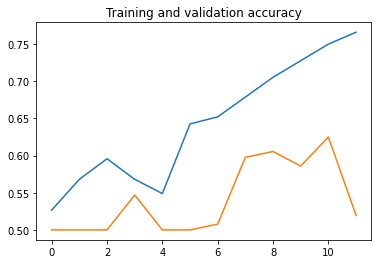

<Figure size 432x288 with 0 Axes>

In [25]:
plt.plot  ( epochs, train_acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

Text(0.5, 1.0, 'Training and validation loss')

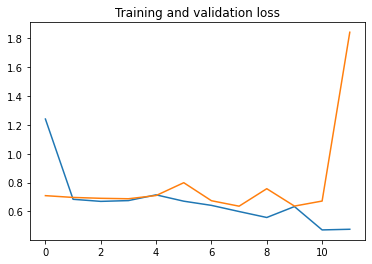

In [26]:
plt.plot  ( epochs, train_loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

**Upload and predict a new image**

In [0]:
#Upload a new image
uploaded = files.upload()

Saving valhuman05-27.png to valhuman05-27.png


In [0]:
for i in uploaded.keys():
  path = '/content/' + i
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images)
  print(classes[0])
  if classes[0]>0.5:
    print(i + " is a human")
  else:
    print(i + " is a horse")

[1.]
valhuman05-27.png is a human
